In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import geopandas as gpd
import pandas as pd
from fiona.crs import from_epsg
import seaborn as sns


In [2]:
!pip3 install contextily

In [3]:
#reference system for Magna Sirgas Bogota zone
epsg = 3116

### Cargar los datos de la geometría a analizar

In [4]:
receiver_survey = gpd.GeoDataFrame.from_file('../data_geometry/receiver_POSTPLOT_shapefile/receiver_shapes_tenerife.shp')
source_survey = gpd.GeoDataFrame.from_file('../data_geometry/source_POSTPLOT_shapefile/source_shapes_tenerife.shp')

In [5]:
receiver_survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217,receiver,POINT (1025139.000 1252080.900)
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217,receiver,POINT (1025158.300 1252077.600)
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217,receiver,POINT (1025178.600 1252074.000)
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217,receiver,POINT (1025198.000 1252070.600)
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217,receiver,POINT (1025217.600 1252067.300)
...,...,...,...,...,...,...,...,...
4327,R3252,11781G1,1028791.4,1256555.0,137.2344,90614,receiver,POINT (1028791.400 1256555.000)
4328,R3252,11791G1,1028811.2,1256551.5,135.7344,90614,receiver,POINT (1028811.200 1256551.500)
4329,R3252,11801G1,1028830.8,1256548.0,135.3344,90614,receiver,POINT (1028830.800 1256548.000)
4330,R3252,11811G2,1028830.8,1256548.0,135.3344,104452,receiver,POINT (1028830.800 1256548.000)


In [6]:
source_survey

,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO,ESTE,NORTE,ELEVACION,TYPE,geometry
0,S1054,300010.0,13.0,21,55,1025485.1,1252025.5,80.3333160428,source,POINT (1025485.100 1252025.500)
1,S1095,300010.0,13.0,31,56,1026296.5,1251886.5,105.9333161554,source,POINT (1026296.500 1251886.500)
2,S1216,3000100.0,8.5,9,57,1028671.4,1251467.3,82.5333162006,source,POINT (1028671.400 1251467.300)
3,S1198,3000100.0,7.5,6,58,1028326.9,1251533.7,82.6333162053,source,POINT (1028326.900 1251533.700)
4,S1162,3000100.0,8.5,14,59,1027614.4,1251650.9,81.8333162219,source,POINT (1027614.400 1251650.900)
...,...,...,...,...,...,...,...,...,...,...
3390,S1156,324510.0,13.0,83,600,1028342.9,1256500.8,96.6348114928,source,POINT (1028342.900 1256500.800)
3391,S1094,325110.0,13.0,223,601,1027140.7,1256832.3,127.2348115211,source,POINT (1027140.700 1256832.300)
3392,S1179,325010.0,13.0,133,602,1028810.2,1256524.9,136.7348115257,source,POINT (1028810.200 1256524.900)
3393,S1094,325010.0,13.0,213,603,1027140.7,1256819.0,127.5348115334,source,POINT (1027140.700 1256819.000)


#### Unificar los datos de receptores y fuentes en el mismo data frame para realizar cálculos como mapa de cobertura (fold) y visualización de la geometría

In [7]:
survey = receiver_survey.append(source_survey)

In [8]:
survey

,RECEIVERSE,UNKNOWN2,ESTE,NORTE,ELEVACION,UNKNOWN2_1,TYPE,geometry,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO
0,R3000,10371G1,1025139.0,1252080.9,92.0333,134217.0,receiver,POINT (1025139.000 1252080.900),NaN,NaN,NaN,NaN,NaN
1,R3000,10381G1,1025158.3,1252077.6,91.5333,134217.0,receiver,POINT (1025158.300 1252077.600),NaN,NaN,NaN,NaN,NaN
2,R3000,10391G1,1025178.6,1252074.0,94.7333,134217.0,receiver,POINT (1025178.600 1252074.000),NaN,NaN,NaN,NaN,NaN
3,R3000,10401G1,1025198.0,1252070.6,97.1333,134217.0,receiver,POINT (1025198.000 1252070.600),NaN,NaN,NaN,NaN,NaN
4,R3000,10411G1,1025217.6,1252067.3,100.0333,134217.0,receiver,POINT (1025217.600 1252067.300),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,NaN,NaN,1028342.9,1256500.8,96.6348114928,NaN,source,POINT (1028342.900 1256500.800),S1156,324510.0,13.0,83.0,600.0
3391,NaN,NaN,1027140.7,1256832.3,127.2348115211,NaN,source,POINT (1027140.700 1256832.300),S1094,325110.0,13.0,223.0,601.0
3392,NaN,NaN,1028810.2,1256524.9,136.7348115257,NaN,source,POINT (1028810.200 1256524.900),S1179,325010.0,13.0,133.0,602.0
3393,NaN,NaN,1027140.7,1256819.0,127.5348115334,NaN,source,POINT (1027140.700 1256819.000),S1094,325010.0,13.0,213.0,603.0


In [25]:
#IDENTIFICAR SHOTS ESPECIFICOS
surv = source_survey[source_survey['SHOTSEQ']=='S1126']
#surv = surv[surv['UNKNOWN']<300000]
#print('Min='+str(surv['UNKNOWN'].min())+', Max='+str(surv['UNKNOWN'].max()))
surv['shotid'] = surv['UNKNOWN'].astype(str).str[0:4] #Los primeros 4 numeros de la columna UNKNOWN son el identificador del shot
surv['shotid'] = surv['shotid'].astype(int)
surv
#survey = receiver_survey.append(surv[surv['shotid']<3089]) #escoger solo los que me interesan

/Users/correa/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,SHOTSEQ,UNKNOWN,DEPTHFT,UHT,ARCHIVO,ESTE,NORTE,ELEVACION,TYPE,geometry,shotid
26,S1126,300110.0,13.0,14,91,1026907.5,1251803.3,103.4334103244,source,POINT (1026907.500 1251803.300),3001
34,S1126,300210.0,13.0,22,99,1026909.9,1251820.2,99.9334104233,source,POINT (1026909.900 1251820.200),3002
71,S1126,300610.0,13.0,16,136,1026923.1,1251899.2,91.0334114605,source,POINT (1026923.100 1251899.200),3006
80,S1126,300710.0,13.0,11,145,1026931.2,1251913.5,86.3334115228,source,POINT (1026931.200 1251913.500),3007
88,S1126,300810.0,13.0,10,153,1026928.1,1251934.4,85.7334124203,source,POINT (1026928.100 1251934.400),3008
...,...,...,...,...,...,...,...,...,...,...,...
2611,S1126,318810.0,13.0,92,802,1027553.4,1255479.5,84.6346110604,source,POINT (1027553.400 1255479.500),3188
3099,S1126,3223100.0,8.0,63,301,1027678.9,1256176.1,81.9347122721,source,POINT (1027678.900 1256176.100),3223
3116,S1126,3224100.0,8.5,83,318,1027680.4,1256189.2,81.7347131317,source,POINT (1027680.400 1256189.200),3224
3125,S1126,3225100.0,8.5,53,327,1027683.7,1256207.1,82.0347132349,source,POINT (1027683.700 1256207.100),3225


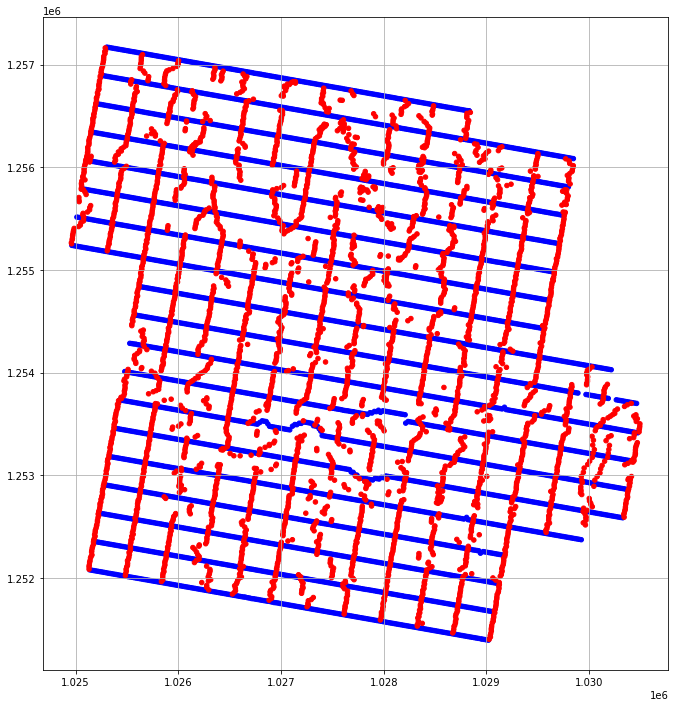

In [31]:
survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
plt.grid()
plt.show()

In [9]:
survey.crs

<Derived Projected CRS: EPSG:3116>
Name: MAGNA-SIRGAS / Colombia Bogota zone
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'W and 1°30'E of Bogota (75°35'W and 72°35'W of Greenwich).
- bounds: (-75.59, -2.51, -72.58, 11.82)
Coordinate Operation:
- name: Colombia MAGNA Bogota zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

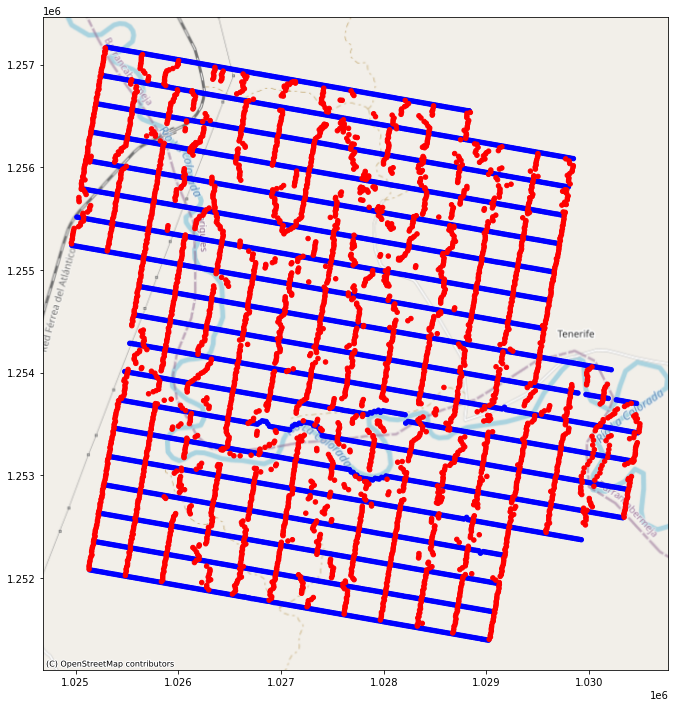

In [10]:
import contextily as cx
ax = survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
cx.add_basemap(ax, crs=survey.crs, source=cx.providers.OpenStreetMap.Mapnik)

### Calcular parámetros de la geometría

In [9]:
NS = source_survey.shape[0]
NR = receiver_survey.shape[0]
print('Number of Sources =', NS)
print('Number of Receivers = ', NR)

Number of Sources = 3395
Number of Receivers =  4332


In [10]:
#Calculate number of receiver lines and number of receivers on each line
temprec = np.asarray(receiver_survey.RECEIVERSE)
rec_lines, rec_per_line = np.unique(temprec, return_counts=True)
NRL = rec_lines.size # Number of receiver lines
print('Receiver lines: ', rec_lines)
print('Receivers on each line: ', rec_per_line) #number of receivers per line
print('Number of receiver lines: ', NRL)

Receiver lines:  ['R3000' 'R3014' 'R3028' 'R3042' 'R3056' 'R3070' 'R3084' 'R3098' 'R3112'
 'R3126' 'R3140' 'R3154' 'R3168' 'R3182' 'R3196' 'R3210' 'R3224' 'R3238'
 'R3252']
Receivers on each line:  [198 198 198 198 234 252 252 252 252 243 234 235 234 234 234 234 234 234
 182]
Number of receiver lines:  19


Info organizada de la geometría (Receptoras)

In [11]:
Rec_info = pd.DataFrame(rec_lines, columns =['RECEIVERSE'])
Rec_info['type'] = 'receiver'
Rec_info['amount'] = rec_per_line
Rec_info.head()

,RECEIVERSE,type,amount
0,R3000,receiver,198
1,R3014,receiver,198
2,R3028,receiver,198
3,R3042,receiver,198
4,R3056,receiver,234


In [12]:
#Calculate number of source lines and number of sources on each line
tempsrc = np.asarray(source_survey.SHOTSEQ)
src_lines, src_per_line = np.unique(tempsrc, return_counts=True)
NSL = src_lines.size # Number of source lines
print('Source lines: ', src_lines)
print('Sources on each line: ', src_per_line)#number of sources per line
print('Number of source lines: ', NSL)

#Otras formas de calcular el numero de fuentes en cada linea
#shot_count = source_survey.groupby('SHOTSEQ')['UNKNOWN'].count()
#shot_count = source_survey['SHOTSEQ'].value_counts()
#print(shot_count)


Source lines:  ['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1014' 'S1015'
 'S1016' 'S1017' 'S1018' 'S1019' 'S1020' 'S1021' 'S1023' 'S1027' 'S1029'
 'S1030' 'S1031' 'S1032' 'S1034' 'S1036' 'S1037' 'S1038' 'S1040' 'S1041'
 'S1042' 'S1043' 'S1044' 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050'
 'S1051' 'S1052' 'S1053' 'S1054' 'S1055' 'S1056' 'S1058' 'S1059' 'S1061'
 'S1062' 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070'
 'S1071' 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079'
 'S1080' 'S1081' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089' 'S1090'
 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098' 'S1099'
 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107' 'S1108'
 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1117' 'S1118'
 'S1119' 'S1120' 'S1121' 'S1122' 'S1123' 'S1124' 'S1125' 'S1126' 'S1127'
 'S1128' 'S1129' 'S1130' 'S1131' 'S1132' 'S1133' 'S1134' 'S1135' 'S1136'
 'S1137' 'S1138' 'S1139' 'S1140' 'S1

In [13]:
Sou_info = pd.DataFrame(src_lines, columns =['SHOTSEQ'])
Sou_info['type'] = 'source'
Sou_info['amount'] = src_per_line
Sou_info.head(20)

,SHOTSEQ,type,amount
0,S1000,source,82
1,S1001,source,2
2,S1002,source,6
3,S1003,source,5
4,S1004,source,3
5,S1005,source,1
6,S1006,source,3
7,S1014,source,4
8,S1015,source,5
9,S1016,source,2


In [18]:
shot_count = source_survey['SHOTSEQ'].value_counts()
shot_count.head(50)

S1216    195
S1036    190
S1234    188
S1054    173
S1180    157
S1108    151
S1090    150
S1126    146
S1162    145
S1198    143
S1072    138
S1144     86
S1000     82
S1018     78
S1252     65
S1288     37
S1135     23
S1233     22
S1183     21
S1197     20
S1143     19
S1182     18
S1199     18
S1125     18
S1161     17
S1107     16
S1268     15
S1145     15
S1153     15
S1094     15
S1038     15
S1110     14
S1140     14
S1160     14
S1124     14
S1166     14
S1109     13
S1127     13
S1179     13
S1117     13
S1092     12
S1070     12
S1058     12
S1068     12
S1147     12
S1136     11
S1095     11
S1102     11
S1091     11
S1075     10
Name: SHOTSEQ, dtype: int64

### Calcular distancia entre fuentes para cada línea 

In [37]:
def calculate_srcdist(temps,coord):
    temps = temps.sort_values(by=[coord])    #Ordenar los puntos de una línea de norte a sur
    temps['idx'] = range(temps.shape[0])       #Asignar indice segun el orden de los puntos en la línea 
    temps = temps[['SHOTSEQ','geometry','idx']]  #Extraer solo la geometria y el indice de cada registro
    copy1_temps = temps['geometry'][:-1] #From first to penultimate
    copy2_temps = temps['geometry'][1:] #From second to last
    temps['distances'] = copy2_temps.distance(copy1_temps, align=False)  #Calcular distancia de un shot con el anterior
    temps.iloc[0,3] = 0    #Fijar la distancia del primer shot en cada línea en cero (porque calculo la distancia de un shot con el anterior)
    return temps
    

sourcedist_df = pd.DataFrame(columns = ['SHOTSEQ', 'geometry', 'idx', 'distances']) #Crear dataframe global vacío

for line in src_lines:
    temp_df = source_survey[source_survey['SHOTSEQ']==line]
    temp_df = calculate_srcdist(temp_df,'NORTE')
    sourcedist_df = sourcedist_df.append(temp_df)    #Agregar los registros de la línea de shot analizada al dataframe global
    

In [38]:
sourcedist_df.head()

,SHOTSEQ,geometry,idx,distances
2215,S1000,POINT (1024962.000 1255255.100),0,0.000000
2242,S1000,POINT (1024959.700 1255265.600),1,10.748953
2265,S1000,POINT (1024966.800 1255293.300),2,28.595454
2275,S1000,POINT (1024969.900 1255307.300),3,14.339107
2287,S1000,POINT (1024971.600 1255332.200),4,24.957965


#### Truncar las líneas de fuentes que tengan menos de cierta cantidad de fuentes, para poder calcular coherencia mutua

In [39]:
#source_survey['SHOTSEQ'].value_counts()>100
inds = np.where(src_per_line >21) # 22 es el umbral para obtener 17 lineas fuentes como dice el reporte observador
trunc_src_lines = src_lines[inds]
sourcedist_df = sourcedist_df.loc[sourcedist_df['SHOTSEQ'].isin(trunc_src_lines)]
sourcedist_df.head()


,SHOTSEQ,geometry,idx,distances
2215,S1000,POINT (1024962.000 1255255.100),0,0.000000
2242,S1000,POINT (1024959.700 1255265.600),1,10.748953
2265,S1000,POINT (1024966.800 1255293.300),2,28.595454
2275,S1000,POINT (1024969.900 1255307.300),3,14.339107
2287,S1000,POINT (1024971.600 1255332.200),4,24.957965


#### Calcular distancia promedio entre fuentes de cada línea
Observación: Estos promedios tienen outliers debido a las fuentes ubicadas en off-set que generan líneas de disparos intermedias, con un número muy reducido de fuentes (hasta una sola fuente). Por eso en el paso anterior se descartaron las líneas con una cantidad reducida de fuentes.

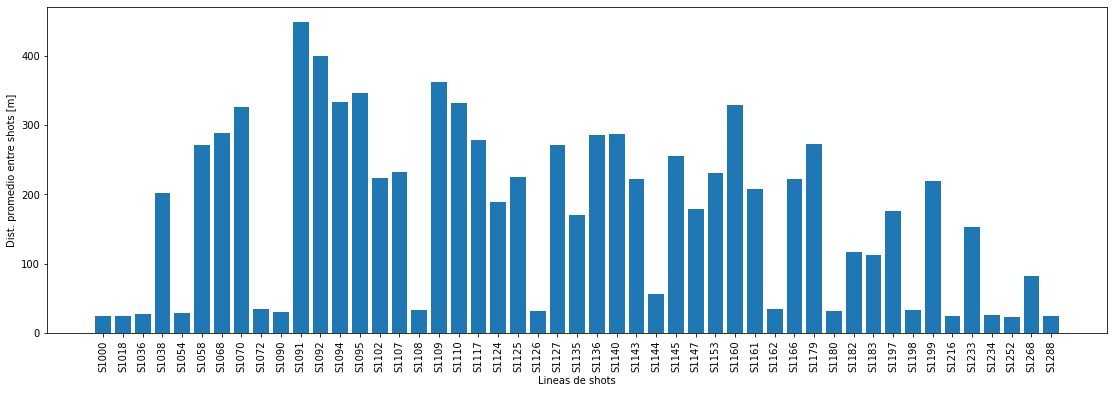

In [63]:
avg_shot_dist = sourcedist_df.groupby('SHOTSEQ')['distances'].mean()

plt.figure(figsize=(19, 6))
#plt.bar(src_lines,avg_shot_dist) #Antes de seleccionar subconjunto de líneas
plt.bar(trunc_src_lines,avg_shot_dist)
plt.xticks(rotation='vertical')
plt.xlabel('Lineas de shots')
plt.ylabel('Dist. promedio entre shots [m]')
plt.show()

#avg_shot_dist.head(18)

In [67]:
#Distancia promedio entre fuentes para todas las líneas
print('Dist. promedio entre shots/linea = ',avg_shot_dist.mean())
print('Std. dev dist. entre shots/linea = ',avg_shot_dist.std())
#Numero de total de shots
print('Numero total de shots = ',sourcedist_df.shape[0])


Dist. promedio entre shots/linea =  178.3004159082483
Std. dev dist. entre shots/linea =  123.8670695545404
Numero total de shots =  2617


#### Calcular distancia entre receptores para cada línea

In [40]:
def calculate_recdist(temps,coord):
    temps = temps.sort_values(by=[coord])    #Ordenar los puntos de una línea de norte a sur
    temps['idx'] = range(temps.shape[0])       #Asignar indice segun el orden de los puntos en la línea 
    temps = temps[['RECEIVERSE','geometry','idx']]  #Extraer solo la geometria y el indice de cada registro
    copy1_temps = temps['geometry'][:-1] #From first to penultimate
    copy2_temps = temps['geometry'][1:] #From second to last
    temps['distances'] = copy2_temps.distance(copy1_temps, align=False)  #Calcular distancia de un shot con el anterior
    temps.iloc[0,3] = 0    #Fijar la distancia del primer shot en cada línea en cero
    return temps

receivdist_df = pd.DataFrame(columns = ['RECEIVERSE', 'geometry', 'idx', 'distances']) #Crear dataframe global vacío

for line in rec_lines:
    temp_df = receiver_survey[receiver_survey['RECEIVERSE']==line]
    temp_df = calculate_recdist(temp_df,'ESTE')        
    receivdist_df = receivdist_df.append(temp_df)    #Agregar los registros de la línea de receptores analizada al dataframe global
    

In [19]:
receivdist_df.head()

,RECEIVERSE,geometry,idx,distances
0,R3000,POINT (1025139.000 1252080.900),0,0.000000
1,R3000,POINT (1025158.300 1252077.600),1,19.580092
2,R3000,POINT (1025178.600 1252074.000),2,20.616741
3,R3000,POINT (1025198.000 1252070.600),3,19.695685
4,R3000,POINT (1025217.600 1252067.300),4,19.875865


#### Calcular distancias promedio para cada línea de receptoras
Observación: La distancia promedio en cada línea no se ve afectada debido a que no hay casos de receptoras ubicadas en offset.

In [41]:
avg_receiv_dist = receivdist_df.groupby('RECEIVERSE')['distances'].mean()

plt.figure(figsize=(16, 4))
plt.bar(rec_lines,avg_receiv_dist)
plt.xticks(rotation='vertical')
plt.xlabel('Lineas de receptoras')
plt.ylabel('Dist. promedio entre receptoras [m]')
#plt.grid(axis = 'y')
plt.show()

#avg_receiv_dist.head(18)

#### Calcular distancia entre líneas de shots

In [24]:
temp_este = source_survey.groupby(['SHOTSEQ'])['ESTE'].mean().reset_index()

temp_este.head()

,SHOTSEQ,ESTE
0,S1000,1.025146e+06
1,S1001,1.025084e+06
2,S1002,1.025117e+06
3,S1003,1.025070e+06
4,S1004,1.025079e+06


In [29]:
copy1_temp_este = temp_este['ESTE'][:-1] #From first to penultimate
copy2_temp_este = temp_este['ESTE'][1:] #From second to last
aaaaaa = copy2_temp_este.distance(copy1_temp_este, align=False)  #Calcular distancia de un shot con el anterior
#aaaaaa=aaaaaa[1:]
print(aaaaaa)
#for line in temp_este['SHOTSEQ']:
#    temp_ddf = source_survey[source_survey['SHOTSEQ']==line]
#    temp_ddf = calculate_srcdist(temp_ddf,'ESTE')
#    sourcelinedist_df = sourcelinedist_df.append(temp_ddf)    #Agregar los registros de la línea de shot analizada al dataframe global


AttributeError: 'Series' object has no attribute 'distance'

In [27]:
print(temp_este['ESTE'].size)

237


In [110]:
copy1_temp_este = temp_este['ESTE'][:-1] #From first to penultimate
copy2_temp_este = temp_este['ESTE'][1:] #From second to last
temp_dist= copy2_temp_este.distance(copy1_temp_este, align=False)  #Calcular distancia de una linea con la anterior
print(temp_dist)

KeyError: 'ESTE'

### Calcular todos los parámetros de fuentes de la geometria submuestreada

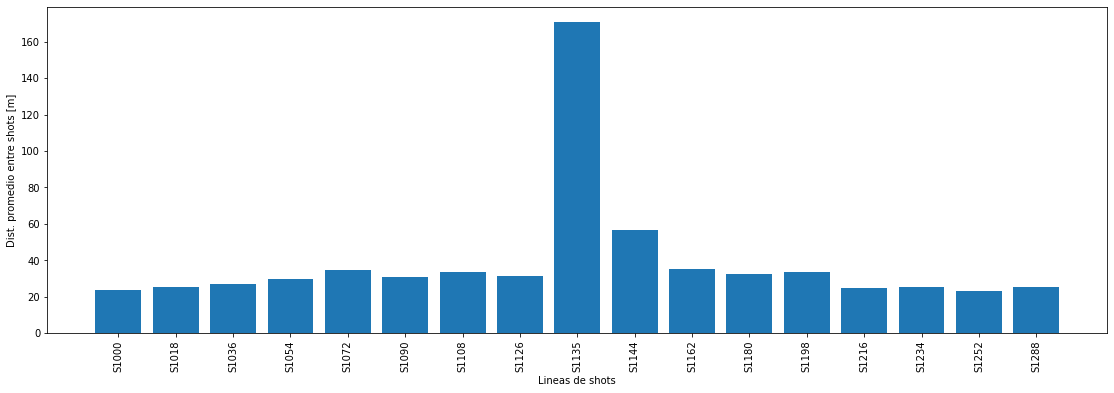

Dist. promedio entre shots/linea =  38.95363313389664
Std. dev dist. entre shots/linea =  34.81020753248666
Numero total de shots =  2147


In [44]:
def calculate_geometry_params(gdf,tau):
    #Truncar linear de shots
    inds = np.where(src_per_line >tau) 
    trunc_src_lines = src_lines[inds]
    gdf = gdf.loc[gdf['SHOTSEQ'].isin(trunc_src_lines)]

    #Calcular distancia promedio de shots por linea y graficar
    avg_shot_dist = gdf.groupby('SHOTSEQ')['distances'].mean()
    %matplotlib inline 
    plt.figure(figsize=(19, 6))
    plt.bar(trunc_src_lines,avg_shot_dist)
    plt.xticks(rotation='vertical')
    plt.xlabel('Lineas de shots')
    plt.ylabel('Dist. promedio entre shots [m]')
    plt.show()
    
    return(avg_shot_dist, gdf, trunc_src_lines)
    
(avg_shots,trunc_gdf, trunc_src_lines) = calculate_geometry_params(sourcedist_df, 22)
    
#Imprimir resultados
print('Dist. promedio entre shots/linea = ',avg_shots.mean()) #Distancia promedio entre fuentes para todas las líneas
print('Std. dev dist. entre shots/linea = ',avg_shots.std()) #Desviacion estandar distancia 
print('Numero total de shots = ',trunc_gdf.shape[0])  #Numero de total de shots

    


    

#### Graficar geometría con subconjunto de líneas fuente seleccionadas

NameError: name 'cx' is not defined

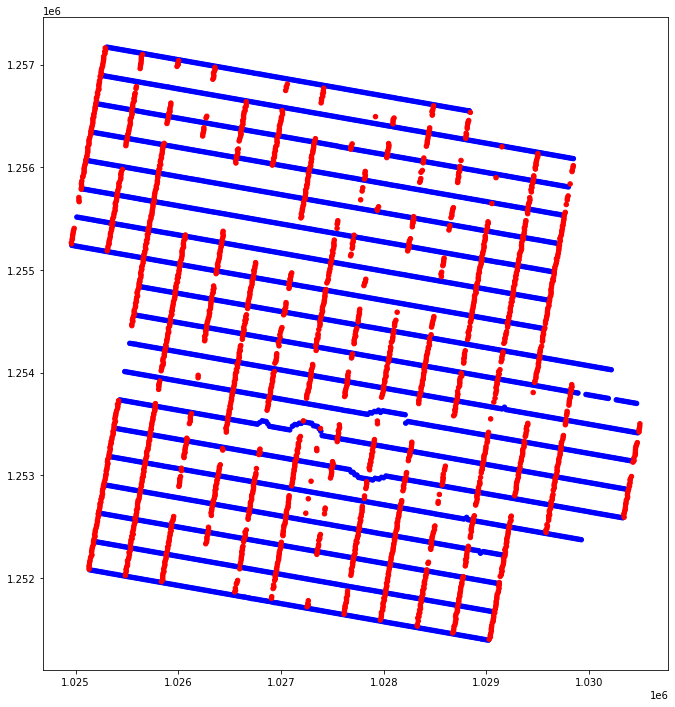

In [45]:
#import contextily as cx

#inds = np.where(src_per_line >22) # Ya fue calculado - 22 es el umbral para obtener 17 lineas fuentes como dice el reporte observador
source_trunc = source_survey.loc[source_survey['SHOTSEQ'].isin(trunc_src_lines)] #trunc_src_lines ya fue calculado
survey = receiver_survey.append(source_trunc)
ax = survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
cx.add_basemap(ax, crs=survey.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.grid()
plt.show()

### Calcular Fold

In [46]:
#Make a Station ID column, so we can recognize the stations again.
sid = np.arange(len(survey))
survey['SID'] = sid

In [47]:
s2 = survey.rotate(10, origin=survey.unary_union.centroid)
s2

0       POINT (1025541.039 1251701.950)
1       POINT (1025560.618 1251702.052)
2       POINT (1025581.235 1251702.031)
3       POINT (1025600.931 1251702.052)
4       POINT (1025620.806 1251702.205)
                     ...               
3379    POINT (1028056.025 1256649.436)
3380    POINT (1028409.485 1256633.370)
3384    POINT (1028055.045 1256640.023)
3385    POINT (1028413.751 1256650.064)
3394    POINT (1028415.905 1256730.561)
Length: 6479, dtype: geometry

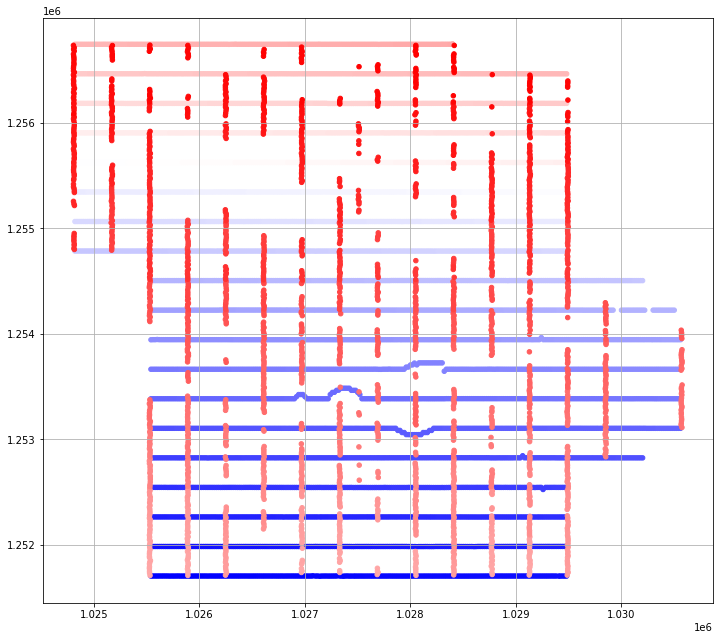

In [48]:
s2.plot(figsize=(12,12), cmap="bwr", markersize=20)
plt.grid()
plt.show()

In [49]:
#Calculate midpoints
rcvrs = s2[0:NR-1]
srcs = s2[NR:]

midpoint_list = [LineString([r, s]).interpolate(0.5, normalized=True)
                 for r in rcvrs
                 for s in srcs]

In [50]:
# Make a list of all the offsets when we count the midpoints into the bins.
offsets = [r.distance(s)
           for r in rcvrs
           for s in srcs]

azimuths = [np.arctan((r.x - s.x)/(r.y - s.y))
            for r in rcvrs
            for s in srcs]

In [51]:
# Make a Geoseries of the midpoints, offsets and azimuths:
midpoints = gpd.GeoDataFrame({'geometry': midpoint_list,
                              'offset': offsets,
                              'azimuth': np.degrees(azimuths),
                              })

midpoints[:5]


,geometry,offset,azimuth
0,POINT (1025716.270 1251704.721),350.505877,89.094151
1,POINT (1027333.681 1251706.508),3585.297020,89.854307
2,POINT (1027158.283 1251709.293),3234.522260,89.739850
3,POINT (1026797.270 1251705.141),2512.469932,89.854476
4,POINT (1025536.912 1251704.624),9.835141,-57.060111


KeyboardInterrupt: 

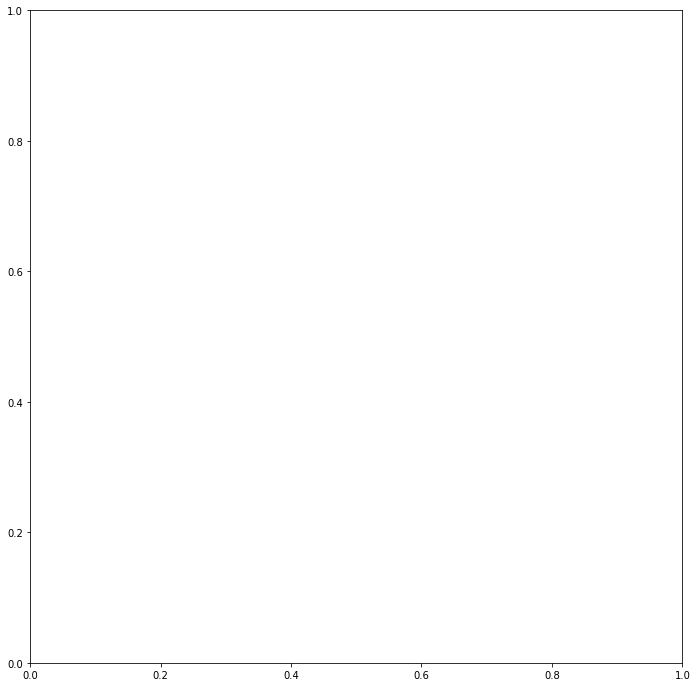

In [52]:
ax = midpoints.plot(figsize=(12,12),column='offset', cmap="bwr", markersize=15)

In [53]:
#Spider plot (Might not be needed, but just in case)
midpoints['offsetx'] = offsets * np.cos(azimuths)
midpoints['offsety'] = offsets * np.sin(azimuths)
midpoints[:5].offsetx  # Easy!

0     5.541285
1     9.116786
2    14.686223
3     6.381365
4     5.347945
Name: offsetx, dtype: float64

In [55]:
x = [m.geometry.x for i, m in midpoints.iterrows()]
y = [m.geometry.y for i, m in midpoints.iterrows()]

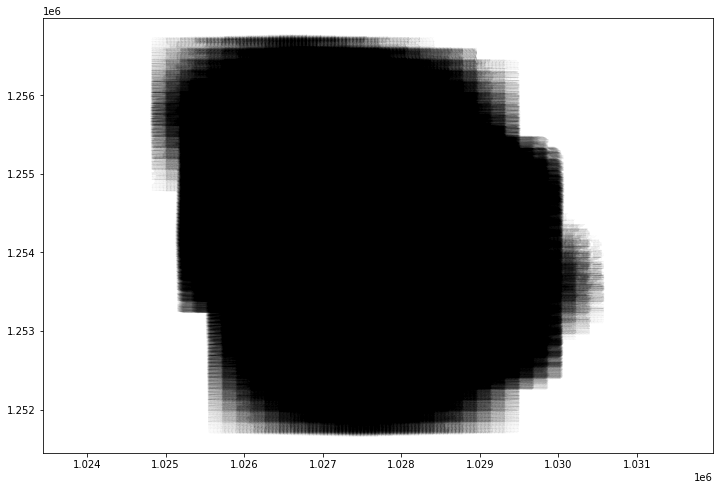

In [23]:
#%matplotlib qt
fig = plt.figure(figsize=(12,8))
plt.quiver(x, y, midpoints.offsetx, midpoints.offsety, units='xy', width=0.5, scale=1/0.025, pivot='mid', headlength=0)
plt.axis('equal')
plt.show()

### Use ideal Preplot to create the Bins

In [24]:
#BINS - Created as new geometry from the ideal geometry (pre-plot)
# Parameters from report
si = 20            # Source point interval (m)
ri = 20            # Receiver point interval (m)
extent_c = s2.total_bounds 
extent = [extent_c[2]-extent_c[0], extent_c[3]-extent_c[1]]
#Extract coordinates of the bottom-left point
xmi = extent_c[0] #Easting of bottom-left corner of grid (m)
ymi = extent_c[1] #Northing of bottom-left corner (m)
rperline = int(extent[0]/ri) + 2
sperline = int(extent[1]/si) + 2

In [25]:
extent

[5769.373822248774, 5042.510292393621]

In [26]:
# Load preplot geometry
pre_r_survey = gpd.GeoDataFrame.from_file('../data_geometry/receiver_PREPLOT_shapefile/receiver_PREPLOT_shapefile.shp')
pre_s_survey = gpd.GeoDataFrame.from_file('../data_geometry/source_PREPLOT_shapefile/source_PREPLOT_shapefile.shp')
pre_r_survey['TYPE']='receiver'
pre_s_survey['TYPE']='source'

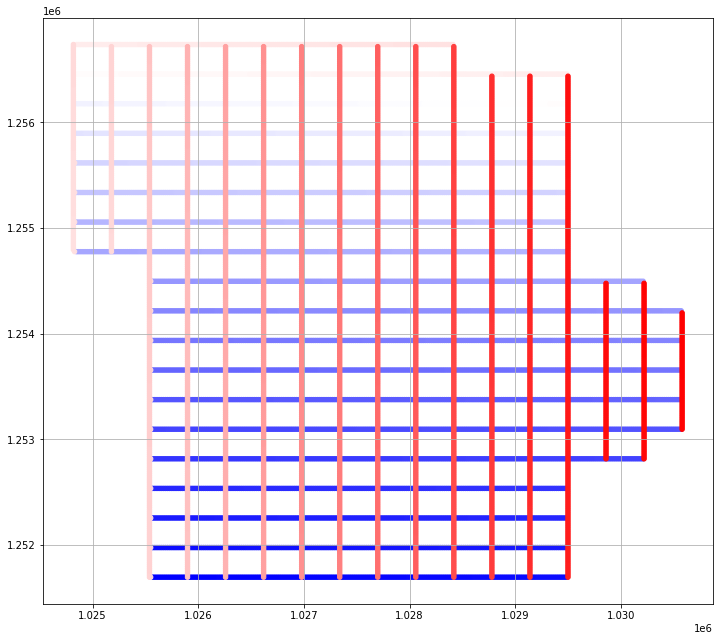

In [27]:
pre_survey = pre_r_survey.append(pre_s_survey)
#pre_survey.plot(figsize=(12,12), column='TYPE', cmap="bwr", markersize=20)
#plt.grid()
#plt.show()
pre_survey_rot = pre_survey.rotate(10, origin=pre_survey.unary_union.centroid)
pre_survey_rot.plot(figsize=(12,12), cmap="bwr", markersize=20)
plt.grid()
plt.show()


In [28]:
#Create the bin centres
# Factor to shift the bins relative to source and receiver points
jig = si / 2.
bin_centres = gpd.GeoSeries([Point(xmi + 0.5*r*ri + jig, ymi + 0.5*s*si + jig)
                             for r in range(2*rperline - 3)
                             for s in range(2*sperline - 2)
                            ])

# Buffers are diamond shaped so we have to scale and rotate them.
scale_factor = np.sin(np.pi/4.)/2.
bin_polys = bin_centres.buffer(scale_factor*ri, 1).rotate(-45)
bins = gpd.GeoDataFrame(geometry=bin_polys)

bins[:3]

,geometry
0,"POLYGON ((1024831.457 1251702.027, 1024821.457..."
1,"POLYGON ((1024831.457 1251712.027, 1024821.457..."
2,"POLYGON ((1024831.457 1251722.027, 1024821.457..."


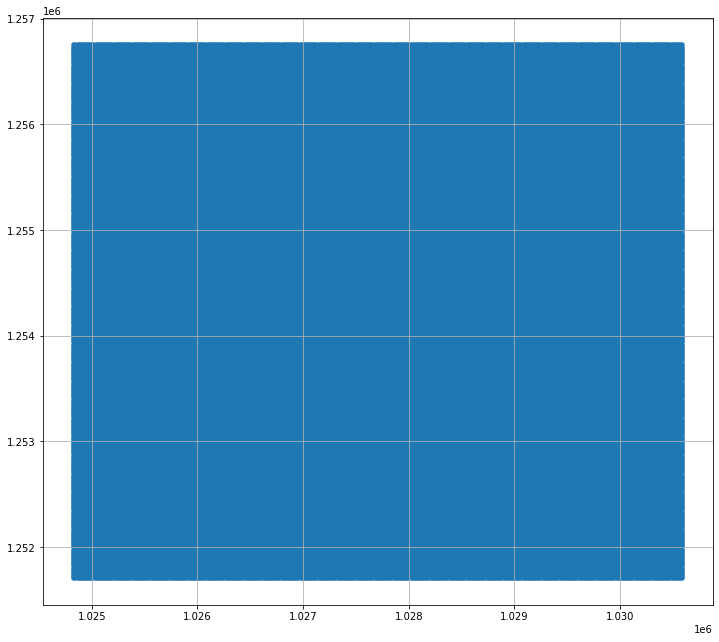

In [29]:
bin_centres.plot(figsize=(12,12), markersize=5)
plt.grid()
plt.show()

In [30]:
%matplotlib qt
#%matplotlib inline #To display image within the cell
bins.plot(figsize=(12,12), edgecolor="black") #Paul grafica la geometría encima, y los centros de los bins

<AxesSubplot:>

In [31]:
bins['seqbin']=range(291962) #Number of bins obtained from bin_centres.shape
bins

,geometry,seqbin
0,"POLYGON ((1024831.457 1251702.027, 1024821.457...",0
1,"POLYGON ((1024831.457 1251712.027, 1024821.457...",1
2,"POLYGON ((1024831.457 1251722.027, 1024821.457...",2
3,"POLYGON ((1024831.457 1251732.027, 1024821.457...",3
4,"POLYGON ((1024831.457 1251742.027, 1024821.457...",4
...,...,...
291957,"POLYGON ((1030591.457 1256712.027, 1030581.457...",291957
291958,"POLYGON ((1030591.457 1256722.027, 1030581.457...",291958
291959,"POLYGON ((1030591.457 1256732.027, 1030581.457...",291959
291960,"POLYGON ((1030591.457 1256742.027, 1030581.457...",291960


In [32]:
def bin_the_midpoints(midpoints,bins):
    pointsInPolygon = gpd.sjoin(midpoints,bins, how="inner", op='intersects')
    pointsInPolygon['fold']=1
    pointsInPolygon.groupby('seqbin').sum()
    return gpd.GeoDataFrame(bins.join(pointsInPolygon.groupby('seqbin').sum()['fold']))

/Users/correa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


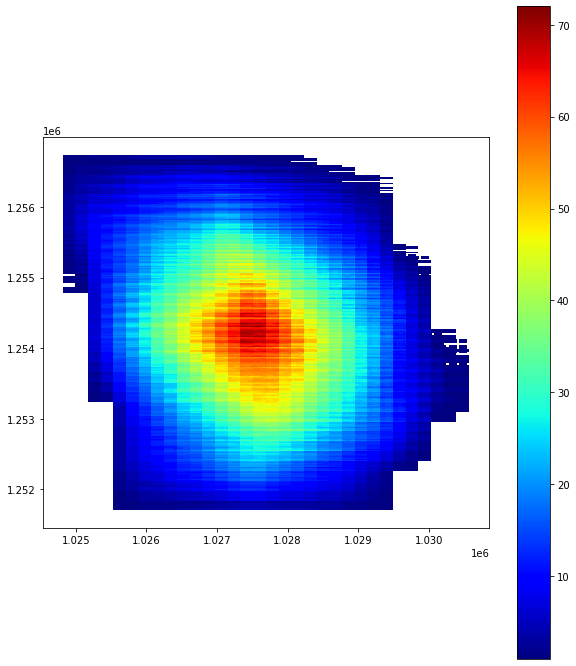

In [56]:
fold = bin_the_midpoints(midpoints,bins)#.fillna(-1) #Paul quita fillna(-1)
fold['fold']=np.ceil(fold['fold'].values/2)
fold.plot(column='fold',cmap='jet',edgecolor="None",legend=True, figsize=(10,12))
plt.show()

### Códigos de prueba: 
Crear columna idy con base en la coordenada ESTE y construir la matriz binaria de representación de la geometría, para calcular coherencia mutua

3286


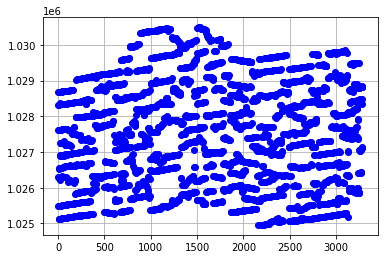

In [23]:
#Hacer matriz binaria de posiciones donde hay fuentes - no es posible usar la coordenada como indicador porque casi todos los shots tienen coordenada ESTE unica como se ve en la figura
print(source_survey.ESTE.unique().shape[0])
estes = source_survey.ESTE.unique()
plt.plot(estes, 'ob')
plt.grid()
plt.show()

Calculations required for the Fold:

In [21]:
len(midpoint_list)

14703745

In [88]:
fold

,geometry,seqbin,fold
0,"POLYGON ((1024826.457 1251697.027, 1024816.457...",0,-1.0
1,"POLYGON ((1024826.457 1251707.027, 1024816.457...",1,-1.0
2,"POLYGON ((1024826.457 1251717.027, 1024816.457...",2,-1.0
3,"POLYGON ((1024826.457 1251727.027, 1024816.457...",3,-1.0
4,"POLYGON ((1024826.457 1251737.027, 1024816.457...",4,-1.0
...,...,...,...
291957,"POLYGON ((1030586.457 1256707.027, 1030576.457...",291957,-1.0
291958,"POLYGON ((1030586.457 1256717.027, 1030576.457...",291958,-1.0
291959,"POLYGON ((1030586.457 1256727.027, 1030576.457...",291959,-1.0
291960,"POLYGON ((1030586.457 1256737.027, 1030576.457...",291960,-1.0


In [90]:
#Save Fold as a shapefile
fold.to_file('../data_geometry/Fold_Postplot/Fold_PostPlot_V1.shp')

In [87]:
fold.plot(column='fold',cmap='jet',legend=True)
plt.show()